# Image Classification Notebook for womens Apperal



### Scenario: E-commerce Startup Specializing in Women's Accessories

Project Goal: Develop an image classification system to automatically categorize product images on an e-commerce platform specializing in women's accessories.    

Background:

"Accessory Avenue" is a new e-commerce startup that aims to provide a curated selection of women's accessories. To streamline their product cataloging process and improve the user experience on their website, they need an automated system to classify images as either:

Women's Accessory: Images that show items like jewelry, handbags, scarves, hats, belts, watches, etc.
Not Women's Accessory: Images that show other types of clothing (dresses, shirts, shoes, etc.) or non-product images.
Dataset:

The development team will use the "Fashion Products Images" dataset from Kaggle. This dataset contains:

A CSV file ("styles.csv") with metadata about various fashion products, including product ID, gender, article type, subcategory, and image file names.    
A collection of image files corresponding to the products listed in the CSV file.    


### About Dataset
Context
The growing e-commerce industry presents us with a large dataset waiting to be scraped and researched. In addition to professionally shot high-resolution product images, we also have multiple label attributes describing the product which were manually entered while cataloging. To add, we also have descriptive text commenting on the product characteristics.
Content
Each product is identified by an ID like 42431. You will find a map of all the products in styles.csv. From here, you can fetch the image for this product from images/42431.jpg. To get started easily, we have exposed some key product categories and their display names in styles.csv.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

df = pd.read_csv('../data/styles.csv')


In [2]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44441 entries, 0 to 44440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44441 non-null  int64  
 1   gender              44441 non-null  object 
 2   masterCategory      44441 non-null  object 
 3   subCategory         44441 non-null  object 
 4   articleType         44441 non-null  object 
 5   baseColour          44426 non-null  object 
 6   season              44420 non-null  object 
 7   year                44440 non-null  float64
 8   usage               44124 non-null  object 
 9   productDisplayName  44434 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [4]:
df.describe()

,id,year
count,44441.000000,44440.000000
mean,29692.147049,2012.805873
std,17048.746205,2.126410
min,1163.000000,2007.000000
25%,14770.000000,2011.000000
50%,28608.000000,2012.000000
75%,44680.000000,2015.000000
max,60000.000000,2019.000000


In [5]:
print(df['gender'].unique())
print(df['articleType'].unique())
print(df['subCategory'].unique())
print(df['masterCategory'].unique())

['Men' 'Women' 'Boys' 'Girls' 'Unisex']
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sunglasses' 'Innerwear Vests' 'Pendant'
 'Nail Polish' 'Laptop Bag' 'Scarves' 'Rain Jacket' 'Dresses'
 'Night suits' 'Skirts' 'Wallets' 'Blazers' 'Ring' 'Kurta Sets' 'Clutches'
 'Shrug' 'Backpacks' 'Caps' 'Trousers' 'Earrings' 'Camisoles' 'Boxers'
 'Jewellery Set' 'Dupatta' 'Capris' 'Lip Gloss' 'Bath Robe' 'Mufflers'
 'Tunics' 'Jackets' 'Trunk' 'Lounge Pants' 'Face Wash and Cleanser'
 'Necklace and Chains' 'Duffel Bag' 'Sports Sandals'
 'Foundation and Primer' 'Sweaters' 'Free Gifts' 'Trolley Bag'
 'Tracksuits' 'Swimwear' 'Shoe Laces' 'Fragrance Gift Set' 'Bangle'
 'Nightdress' 'Ties' 'Baby Dolls' 'Leggings' 'Highlighter and Blush'


In [6]:
dummy = df[df['gender'] =='Women']
women_accessories_df = dummy[dummy['masterCategory'] == 'Accessories']
women_accessories_df

not_women_acc = df[~df['id'].isin(women_accessories_df['id'])]

## we need to check how many images we have that correspond to women accessories 

positive_images = women_accessories_df['id'].astype(str) + '.jpg'
negative_images = not_women_acc['id'].astype(str) + '.jpg'
positive_images= positive_images
negative_images = negative_images

print(positive_images)
print(negative_images)


2        59263.jpg
11       48123.jpg
13       47957.jpg
19       47359.jpg
26       48311.jpg
           ...    
44422    37431.jpg
44423    20486.jpg
44426    10213.jpg
44430    40563.jpg
44440    51623.jpg
Name: id, Length: 5321, dtype: object
0        15970.jpg
1        39386.jpg
3        21379.jpg
4        53759.jpg
5         1855.jpg
           ...    
44435    42234.jpg
44436    17036.jpg
44437     6461.jpg
44438    18842.jpg
44439    46694.jpg
Name: id, Length: 39120, dtype: object


In [7]:
image_size = (80,60) ## to ensure all our images are the same size before we trian our model(They all look like their 60  by 80)

def load_and_process_images(image_path,label): ## we need to make our own labels because we're creating a dataset that has women accessories and non women accessories
    try:
        img =cv2.imread(image_path)
        img = cv2.resize(img,image_size,interpolation=cv2.INTER_LANCZOS4)

        if img.dtype == np.float64:
            # Scale to 0-255 and convert to uint8
            img_converted = (img * 255).astype(np.uint8)
            return img_converted/255, label
        elif img.dtype == np.uint8:
            return img, label

    except:
        return None,None


images =[]
labels = []



for image_file in positive_images:
    image_path = f"../data/images/{image_file}"
    img,label = load_and_process_images(image_path,1)
    if img is not None:
        images.append(img)
        labels.append(label)

for image_file in negative_images:
    image_path = f"../data/images/{image_file}"
    img,label = load_and_process_images(image_path,0)
    if img is not None:
        images.append(img)
        labels.append(label)


processed_images = np.array(images)
processed_labels = np.array(labels)

def display_image(image, label, title=None):
    """Displays a single image with its label."""

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # OpenCV uses BGR
    plt.title(f"Label: {label}")
    plt.axis('off')  # Turn off axis labels
    if title:
        plt.suptitle(title)
    plt.show()

display_image(processed_images[7000],processed_labels[7000])



MemoryError: Unable to allocate 610. MiB for an array with shape (44440, 60, 80, 3) and data type uint8

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os

image_size = (80, 60)
batch_size = 32

X_train, X_test, y_train, y_test = train_test_split(
    processed_images, processed_labels, test_size=0.2, random_state=42
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\thape\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 78, 58, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 39, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 18, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       655,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,865 (2.86 MB)

 Trainable params: 748,865 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - accuracy: 0.8926 - loss: 2.3099 - val_accuracy: 0.9261 - val_loss: 0.1889
Epoch 2/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9269 - loss: 0.1771 - val_accuracy: 0.9337 - val_loss: 0.1645
Epoch 3/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9391 - loss: 0.1492 - val_accuracy: 0.9411 - val_loss: 0.1550
Epoch 4/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.9452 - loss: 0.1343 - val_accuracy: 0.9472 - val_loss: 0.1429
Epoch 5/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9529 - loss: 0.1195 - val_accuracy: 0.9497 - val_loss: 0.1380
Epoch 6/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.9571 - loss: 0.1100 - val_accuracy: 0.9403 - val_loss: 0.1572
Epoch 7/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.9533 - loss: 0.1128 - val_accuracy: 0.9417 - val_loss: 0.1572
Epoch 8/20
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.9619 -

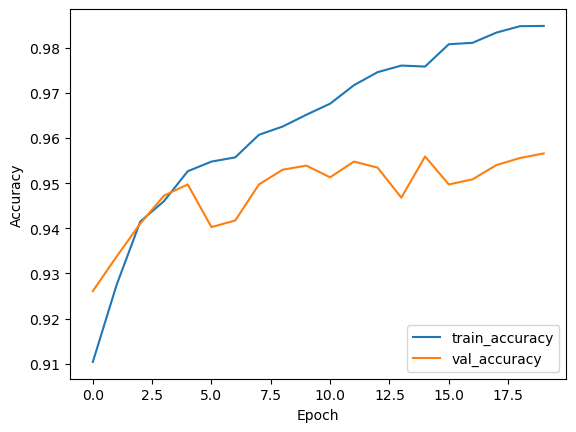

In [ ]:
epochs = 20
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save(filepath='../Artifacts/imageprediction.h5')